# SECOND SEMESTER PROJECT - EDA ON ShopSmart Inc.

### Project Objective:
- The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences.

You are provided with 5 datasets from different tables, your first task is to merge the datasets, clean and wrangle the dataset, engineer new features from event data. Then identify the following:
- a.     Visit Frequency:
How often does this customer visit the website, based on the provided data?
Can you identify any patterns or trends in the customer's visit frequency?
- b. 	Location Analysis:
What is the customer's location based on the provided data?
How might the customer's location influence their purchasing behavior?
- c.  	Overall Purchase Behavior:
Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
How might these insights inform marketing strategies or personalized recommendations for this customer?


## Importing Libraries
- When performing EDA on a dataset, first, we import the required data science packages using their alias

In [1]:
# first we import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extracting data:
- All the data will be extracted and loaded as a dataframe.

In [2]:
customer_df = pd.read_csv('customers.csv')
event_df = pd.read_csv('events.csv')
line_items_df = pd.read_csv('line_items.csv')
product_df = pd.read_csv('products.csv')
order_df = pd.read_csv('orders.csv')

lets take a peek into what our data looks like by calling .head on all the dataframes

In [3]:
customer_df.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [4]:
event_df.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


In [5]:
line_items_df.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [6]:
product_df.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [7]:
order_df.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


- The event dataframe has a has a column(event_data) that contains a dictionary and we will need to extract the keys and values from the dictionary that are necesssary. We will not be extracting all of them as some of those information are already in other dataframes.
- To do this lets look at the unique values inorder to find out the contents of the dictionary. 

In [8]:
event_df['event_data'].unique()

array(['{"timestamp": "2024-03-21T12:47:11.012084", "event_type": "visit"}',
       '{"timestamp": "2024-03-27T11:35:50.208930", "event_type": "visit"}',
       '{"timestamp": "2024-03-30T04:03:10.392205", "event_type": "visit"}',
       ...,
       '{"item_id": 1, "quantity": 3, "timestamp": "2024-03-30T04:03:18.224196", "event_type": "add_to_cart"}',
       '{"item_id": 1, "timestamp": "2024-03-30T04:03:18.224198", "event_type": "remove_from_cart"}',
       '{"status": "failed", "order_id": "ad73a2a0-354a-40bf-81cd-ff017ac859d5", "timestamp": "2024-03-30T04:14:18.224200", "event_type": "checkout"}'],
      dtype=object)

The keys in the dictionary are timestamp, event_type, item_id, quantity, status, order_id and we will only be extracting the event_type. This column although looks like a dictionary, is in a string form so first we will convert it to a dictionary and then go ahead to extract the event_type and make it a column in the dataframe.

In [9]:
# converting to a dictionary.
event_df['event_data'] = event_df['event_data'].apply(ast.literal_eval)

In [10]:
# creating the event_type column from the dictionary
event_df['event_type'] = event_df['event_data'].apply(lambda x: x.get('event_type'))

In [11]:
# lets see if the column was created
event_df.head()

,event_id,customer_id,event_data,event_timestamp,event_type
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-21T12:47:11.012084', 'e...",2024-03-21 12:47:11.012084,visit
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-27T11:35:50.208930', 'e...",2024-03-27 11:35:50.208930,visit
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-30T04:03:10.392205', 'e...",2024-03-30 04:03:10.392205,visit
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'item_id': 12, 'quantity': 5, 'timestamp': '2...",2024-03-30 04:03:10.394393,add_to_cart
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'item_id': 11, 'quantity': 1, 'timestamp': '2...",2024-03-30 04:03:10.394398,add_to_cart


In [12]:
# since we have extracted the information we need form the event_data column, we do not need it so we drop it.
event_df.drop('event_data', axis = 1, inplace= True)

In [13]:
event_df.head()

,event_id,customer_id,event_timestamp,event_type
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-21 12:47:11.012084,visit
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-27 11:35:50.208930,visit
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.392205,visit
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394393,add_to_cart
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394398,add_to_cart


### Looking at the 5 dataframes provided, we can see that they contain different features but are related. We can convert the Five(5) dataframes to 1(one) dataset by merging them one by one on similar columns. We will be using inner merge for this project.

The merging will be in this order

- Customer_df and event_df have customer_id and the will be merged on that.
- The resulting dataframe will be merged with the order_df still on customer_id.
- The resulting dataframe will be merged with the line_item_df on order_id.
- Finally, the resulting dataframe will be merged with the product_df on item_id.

In [14]:
# merging the customer_df anf event_df
df1 = customer_df.merge(event_df, on='customer_id', how= 'inner')
df1.head(2)

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,2024-03-21 12:47:11.012084,visit
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,2024-03-27 11:35:50.208930,visit


In [15]:
# merging the resultant df and order_df
df2 = df1.merge(order_df, on='customer_id', how= 'inner')
df2.head(2)

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,2024-03-21 12:47:11.012084,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,2024-03-27 11:35:50.208930,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413


In [16]:
# merging the resultant df and line_items_df
df3= df2.merge(line_items_df, on= 'order_id', how= 'inner')
df3.head(2)

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4


In [17]:
# merging the resultant df and product_df to give us the final_df
merged_df = df3.merge(product_df, left_on= 'item_id', right_on= 'id', how= 'inner')


In [18]:
# lets take a peek at what our merged_df looks like
merged_df.head()

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,2024-03-30 04:03:10.406559,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,2024-03-30 04:03:10.406561,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,2024-03-30 04:03:10.406769,add_to_cart,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99


## Understanding the dataset:
To understand the dataset, we:
- Check for the number of rows and columns
- take a look at all the column names
- check the data types contained in each column
- calculate the sum of missing value in each column

In [19]:
# Check for the number of rows and columns
merged_df.shape

(578320, 16)

In [20]:
# let's take a peak at the varibles(columns)
merged_df.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_timestamp', 'event_type', 'order_id', 'status', 'checked_out_at',
       'line_item_id', 'item_id', 'quantity', 'id', 'name', 'price'],
      dtype='object')

In [21]:
# it is necessary to know if we are dealing with the right datatype of columns
# so that we know to use the most appropriate analytical technique
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_timestamp  578320 non-null  object 
 6   event_type       578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  id               578320 non-null  int64  
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(1), int64(5), object(10)
me

In [22]:
# We check for missing values
merged_df.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_timestamp    0
event_type         0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
id                 0
name               0
price              0
dtype: int64

### INSIGHT:
We can see from the above lines of codes that: 
- We have 578320 rows and 16 columns in the entire dataframe
- The Columns names
- We are dealing with floats, integers and object data types
- None of the column has a missing value.

## Now that we have our dataframe ready, we will start the Data wrangling processes which will include:
- Data cleaning
- Check and drop duplicates
- Check and deal with outliers
- Processing or engineering new columns

## Data Cleaning

In [23]:
merged_df.head()

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,2024-03-30 04:03:10.406559,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,2024-03-30 04:03:10.406561,visit,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,2024-03-30 04:03:10.406769,add_to_cart,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99


The customer_id, device_id, order_id columns are looking ambigious and we will clean this by extraction the last part of the ids and discarding the other parts

In [24]:
# define a function to extract the last part
def extract_last_id_num(df, column):
    """Strips the values in the column into parts, 
    appends the last parts to the list
    and then assigns the list to form a new column"""
    id_list = []
    for ids in df[column]:
        id = ids.split('-')[-1]
        id_list.append(id)
    df[column] = id_list

In [25]:
# using the function above the clean these columns
columns_for_extraction = ['customer_id', 'device_id', 'order_id']
for columns in columns_for_extraction:
    extract_last_id_num(merged_df, columns)

In [26]:
merged_df.head(2)

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,e049bab94504,b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,e049bab94504,b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99


When we merged with product_df on item_id and id, it returned the two columns and since they are the same, we will be dropping the id column

In [27]:
# drop the id column
merged_df.drop('id', axis= 1, inplace= True)

In [28]:
merged_df.head(2)

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,e049bab94504,b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,e049bab94504,b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [29]:
# lets rename the name column to product_name
merged_df.rename(columns={'name': 'product_name'}, inplace=True)

## Check and drop duplicates

In [30]:
merged_df.duplicated().sum()

0

### INSIGHT:
There is no duplicate value in our dataframe

## Check and deal with outliers

In [31]:
# create a dataframe for only numerical columns
num_df = merged_df[['price', 'quantity']]

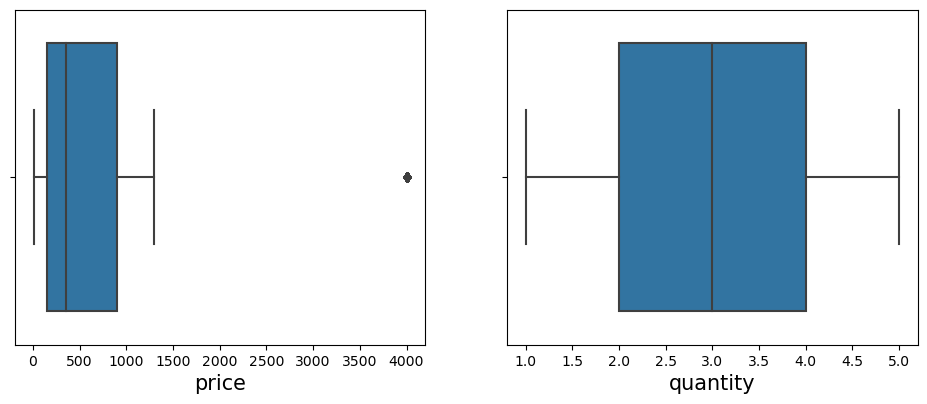

In [32]:
# checking for outliers
plt.figure(figsize= (18, 20)) # set figure size
for i in range(len(num_df.columns)):
    plt.subplot(4, 3, i+1) # creates a subplot
    sns.boxplot(x = num_df.iloc[:, i])
    plt.xlabel(num_df.columns[i], size=15)

From the box plot we can see that the price column has an outlier. we will be removing this outlier using IQR method.

In [33]:
def outliers(df, col):
    """
    Parameters:
        df: The DataFrame containing the data.
        column: The name of the column containing the data to be cleaned.
    
    Returns:
        index of the outliers.
    """
    IQ1 = df[col].quantile(0.25)
    IQ3 = df[col].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    index = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return index

In [34]:
# check the indexes of the outliers
outliers(merged_df, 'price')

Index([191878, 191879, 191880, 191881, 191882, 191883, 191884, 191885, 191886,
       191887,
       ...
       231583, 231584, 231585, 231586, 231587, 231588, 231589, 231590, 231591,
       231592],
      dtype='int64', length=39715)

In [35]:
index = outliers(merged_df, 'price')
index = set(index)
#print(index)
print(f'Total number of outliers are {len(index)}')

# dropping all the outliers
merged_df.drop(index, inplace=True, axis=0)
merged_df.shape

Total number of outliers are 39715


(538605, 15)

In [36]:
# create a dataframe for only numerical columns
num_df = merged_df[['price', 'quantity']]

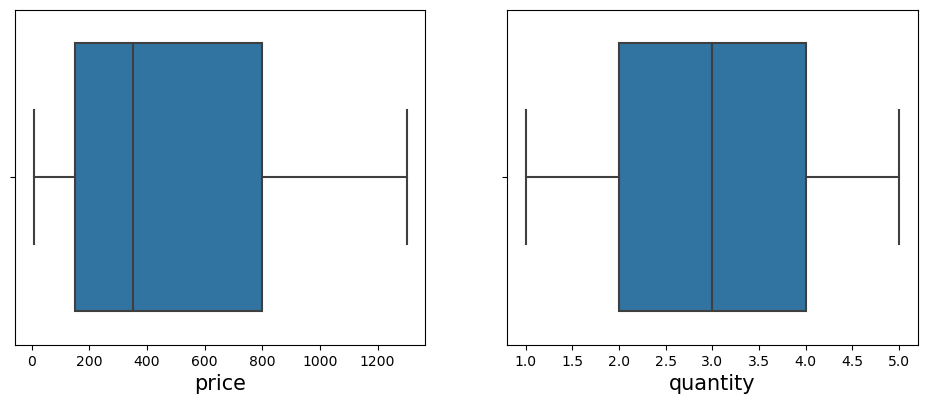

In [37]:
plt.figure(figsize= (18, 20)) # set figure size
for i in range(len(num_df.columns)):
    plt.subplot(4, 3, i+1) # creates a subplot
    sns.boxplot(x = num_df.iloc[:, i])
    plt.xlabel(num_df.columns[i], size=15)

From the above box plot cmpared the the previous one, we can see that there is no outliers in the columns no more.

## Processing or engineering new columns

In [38]:
def get_new_date_columns(date):
    """
    Extract name of day, name of month, year, and AM/PM from a datetime column.
    
    Parameters:
        date (Series): The datetime column to extract features from.
    
    Returns:
        DataFrame: A DataFrame containing the extracted features.
    """
    # Ensure the input is in datetime format
    date_column = pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S.%f')

    # Extracting day name, month name, year, and AM/PM
    day_name = date_column.dt.strftime('%A')  # Full name of the day
    month_name = date_column.dt.strftime('%B')  # Full name of the month
    year = date_column.dt.year
    am_pm = date_column.dt.strftime('%p')

    # Extracting full date
    full_date = date_column.dt.strftime('%Y-%m-%d')

    # Create a DataFrame to store the features
    date_df = pd.DataFrame({'Day': day_name, 'Month': month_name, 'Year': year, 'AM/PM': am_pm, 'Date': full_date})

    return date_df

In [39]:
# create a new dataframe for the dates
date_df = get_new_date_columns(merged_df['event_timestamp'])

In [40]:
# merge the date_df with the original df
merged_df2 = merged_df.merge(date_df, left_index=True, right_index=True, how='inner')

In [41]:
merged_df2.head()

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date
0,e049bab94504,b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26
1,e049bab94504,b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27
2,e049bab94504,b988ba17b245,Saint Helena,NGN,14788,2024-03-30 04:03:10.406559,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30
3,e049bab94504,b988ba17b245,Saint Helena,NGN,14789,2024-03-30 04:03:10.406561,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30
4,e049bab94504,b988ba17b245,Saint Helena,NGN,14790,2024-03-30 04:03:10.406769,add_to_cart,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30


In [42]:
# Convert the datetime columns to pandas datetime objects
merged_df2['checked_out_at'] = pd.to_datetime(merged_df2['checked_out_at'])
merged_df2['event_timestamp'] = pd.to_datetime(merged_df2['event_timestamp'])

# Calculate the duration between column_in and column_out in days
merged_df2['check_out_duration(days)'] = (merged_df2['checked_out_at'] - merged_df2['event_timestamp']).dt.days

In [43]:
merged_df2.head()

,customer_id,device_id,location,currency,event_id,event_timestamp,event_type,order_id,status,checked_out_at,...,item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2
2,e049bab94504,b988ba17b245,Saint Helena,NGN,14788,2024-03-30 04:03:10.406559,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
3,e049bab94504,b988ba17b245,Saint Helena,NGN,14789,2024-03-30 04:03:10.406561,visit,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
4,e049bab94504,b988ba17b245,Saint Helena,NGN,14790,2024-03-30 04:03:10.406769,add_to_cart,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0


Since we have extracted the informations from the event stamptime column, we will drop the column.


In [44]:
# Drop 'event_timestamp' and 'checked_out_at'
merged_df2.drop(['event_timestamp','checked_out_at'], axis=1, inplace=True)

# Understanding relationships between columns

### 1. Event id is like a tag for the event type or mere values assigned to the event types. So for each event type, there is a numerical coded value attached to it more like a label. So since we wont be needing the event id, we will drop it.

In [45]:
merged_df2[['event_id', 'event_type']] #this will show the relationship between them.

,event_id,event_type
0,14786,visit
1,14787,visit
2,14788,visit
3,14789,visit
4,14790,add_to_cart
...,...,...
578315,161946,add_to_cart
578316,161947,add_to_cart
578317,161948,add_to_cart
578318,161949,add_to_cart


In [46]:
#dropping the event_ifd column
merged_df2.drop('event_id', axis= 1, inplace= True)

In [47]:
merged_df2.head()

,customer_id,device_id,location,currency,event_type,order_id,status,line_item_id,item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,b988ba17b245,Saint Helena,NGN,visit,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,b988ba17b245,Saint Helena,NGN,visit,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2
2,e049bab94504,b988ba17b245,Saint Helena,NGN,visit,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
3,e049bab94504,b988ba17b245,Saint Helena,NGN,visit,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
4,e049bab94504,b988ba17b245,Saint Helena,NGN,add_to_cart,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0


### 2. Lets also look at the relationship between the product_name and item_id.

In [48]:
merged_df2[['product_name', 'item_id']]

,product_name,item_id
0,Microsoft Xbox Series X,4
1,Microsoft Xbox Series X,4
2,Microsoft Xbox Series X,4
3,Microsoft Xbox Series X,4
4,Microsoft Xbox Series X,4
...,...,...
578315,Sony PlayStation 5,3
578316,Sony PlayStation 5,3
578317,Sony PlayStation 5,3
578318,Sony PlayStation 5,3


We can see that the item_id is like a numerical tag or label assigned to each product name. SInce they are telling the same thing, we will be dropping the item_id column since the name is more important to our analysis.

In [49]:
# dropping the item_id column
merged_df2.drop('item_id', axis=1, inplace= True)

### 3. Lets look at the relationship between customer_id, device_id, and product_name.

In [50]:
merged_df2[['customer_id', 'device_id', 'product_name']].head(20)

,customer_id,device_id,product_name
0,e049bab94504,b988ba17b245,Microsoft Xbox Series X
1,e049bab94504,b988ba17b245,Microsoft Xbox Series X
2,e049bab94504,b988ba17b245,Microsoft Xbox Series X
3,e049bab94504,b988ba17b245,Microsoft Xbox Series X
4,e049bab94504,b988ba17b245,Microsoft Xbox Series X
5,e049bab94504,b988ba17b245,Microsoft Xbox Series X
6,e049bab94504,b988ba17b245,Microsoft Xbox Series X
7,e049bab94504,b988ba17b245,Microsoft Xbox Series X
8,e049bab94504,b988ba17b245,Microsoft Xbox Series X
9,e049bab94504,b988ba17b245,Microsoft Xbox Series X


We can see that the device is unique to customer_id which means it tell the devide the customer used to log in to the site. but the product_name is different which tell which product the customer checked out or bought. 
- since the devide and customer id are doing the same thing, we will be dropping the device_id

In [51]:
# dropping the device_id column
merged_df2.drop('device_id', axis= True, inplace=True)

In [52]:
merged_df2

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2
2,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
3,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
4,e049bab94504,Saint Helena,NGN,add_to_cart,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578315,bf0de1cda133,Liechtenstein,GBP,add_to_cart,6ccce7bf481d,cancelled,34939,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0
578316,bf0de1cda133,Liechtenstein,GBP,add_to_cart,6ccce7bf481d,cancelled,34939,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0
578317,bf0de1cda133,Liechtenstein,GBP,add_to_cart,6ccce7bf481d,cancelled,34939,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0
578318,bf0de1cda133,Liechtenstein,GBP,add_to_cart,6ccce7bf481d,cancelled,34939,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0


In [53]:
# Convert the year feature to a string object
merged_df2['Year'] = merged_df2['Year'].astype(str)
merged_df2['line_item_id'] = merged_df2['line_item_id'].astype(str)

In [54]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   location                  538605 non-null  object 
 2   currency                  538605 non-null  object 
 3   event_type                538605 non-null  object 
 4   order_id                  538605 non-null  object 
 5   status                    538605 non-null  object 
 6   line_item_id              538605 non-null  object 
 7   quantity                  538605 non-null  int64  
 8   product_name              538605 non-null  object 
 9   price                     538605 non-null  float64
 10  Day                       538605 non-null  object 
 11  Month                     538605 non-null  object 
 12  Year                      538605 non-null  object 
 13  AM/PM                     538605 non-null  object

# EXPLORATORY DATA ANALYSIS - EDA

This phase is extremely important. It helps us to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

EDA are generally classified in two ways:

1) Non-graphical or Graphical
2) Univariate or Multivariate

Lets define the features(columns) in our dataset:
1. customer_id: The unique identifier for each customer that visits the website
2. event_type: The nature of the activity of the customer on the website
3. location: The location of the customer
4. currency: The type of currency used for the transaction
5. status: The status of the purchase- successful or failed
6. quantity: The quantity of the purchase in numbers
7. price: The total price of the purchase/transaction made
8. Day: The day of the week the transaction took place
9. Month: The month the transaction took place
10. Year: The year the transaction took place
11. AM/PM: The time of day the transaction took place- morning or evening
12. Date: The full date of the transaction
13. check_out_duration(days): How long it took the customer to check out
14. product: The name of the items the customer bought

### Non-graphical EDA - Univariate

In [55]:
# we will use .describe() to get the summary or descriptive statistics of our data.
merged_df2.describe()

,quantity,price,check_out_duration(days)
count,538605.000000,538605.000000,538605.000000
mean,3.009142,464.667199,0.452445
std,1.405937,397.553399,1.714673
min,1.000000,5.990000,0.000000
25%,2.000000,149.950000,0.000000
50%,3.000000,349.990000,0.000000
75%,4.000000,799.990000,0.000000
max,5.000000,1299.990000,11.000000


Fron the above result we can seee that the average price is 466.66 and the average quantity of goods bought by customers is 3.0. We can also see the median, quantiles, minimum and maximum values for each numerical value.

### Graphical EDA - Univariate

The types of visualisations we can create differ depending on the data type of each variable. Broadly, we need to determine whether a variable is numerical, or categorical.

In [56]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   location                  538605 non-null  object 
 2   currency                  538605 non-null  object 
 3   event_type                538605 non-null  object 
 4   order_id                  538605 non-null  object 
 5   status                    538605 non-null  object 
 6   line_item_id              538605 non-null  object 
 7   quantity                  538605 non-null  int64  
 8   product_name              538605 non-null  object 
 9   price                     538605 non-null  float64
 10  Day                       538605 non-null  object 
 11  Month                     538605 non-null  object 
 12  Year                      538605 non-null  object 
 13  AM/PM                     538605 non-null  object

we can see that all the columns are categorical except for quantity, price and check_out_duration(days) which are numerical data.

Let's plot a histogram to visualize the price and quantity features.


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'quantity'}>]], dtype=object)

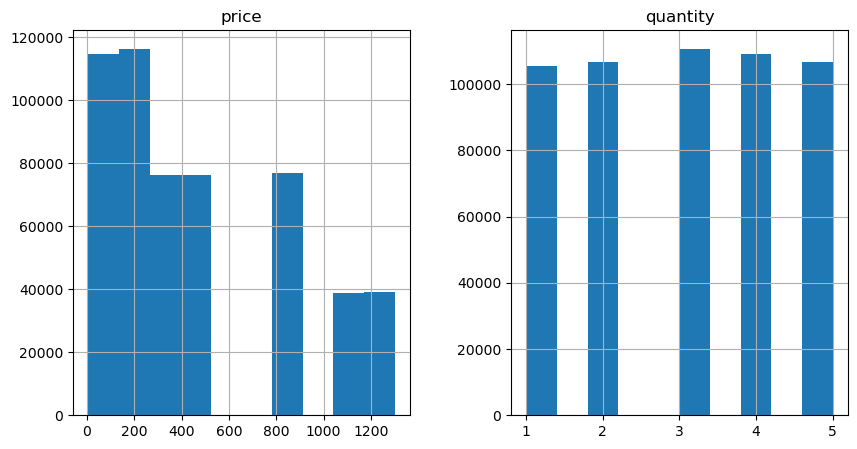

In [57]:
features = ['price', 'quantity'] # create a list of all numerical features
merged_df2[features].hist(figsize=(10,5))

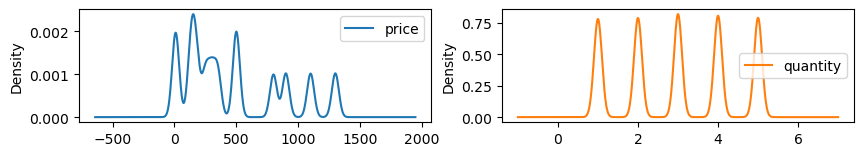

In [58]:
# plot a density plot to visualise the numeric features
merged_df2[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 5));

In [59]:
# create a dataframe for only numerical columns
num_df = merged_df[['price', 'quantity']]

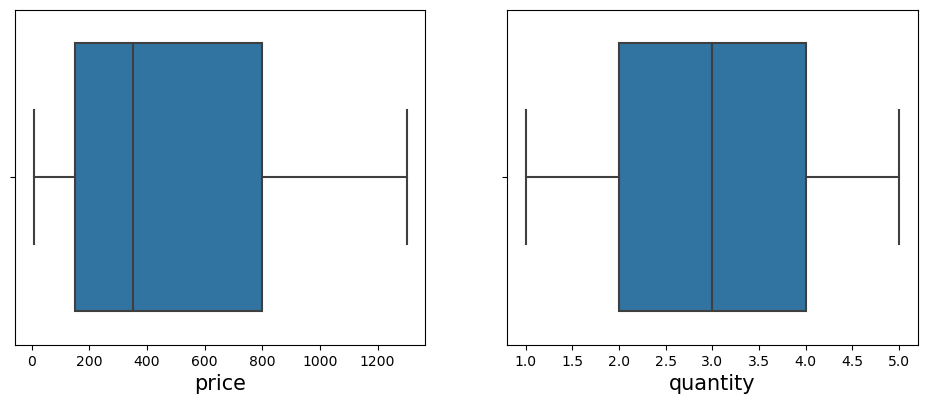

In [60]:
plt.figure(figsize= (18, 20)) # set figure size
for i in range(len(num_df.columns)):
    plt.subplot(4, 3, i+1) # creates a subplot
    sns.boxplot(x = num_df.iloc[:, i])
    plt.xlabel(num_df.columns[i], size=15)

#### Bar Plot

For the categorical features, we can create a **bar plot** to display the frequency distribution.

In [61]:
merged_df2.columns

Index(['customer_id', 'location', 'currency', 'event_type', 'order_id',
       'status', 'line_item_id', 'quantity', 'product_name', 'price', 'Day',
       'Month', 'Year', 'AM/PM', 'Date', 'check_out_duration(days)'],
      dtype='object')

In [62]:
cate_features = ['currency', 'event_type','status', 'Day',
       'Month', 'Year', 'AM/PM', 'Date','check_out_duration(days)'] 

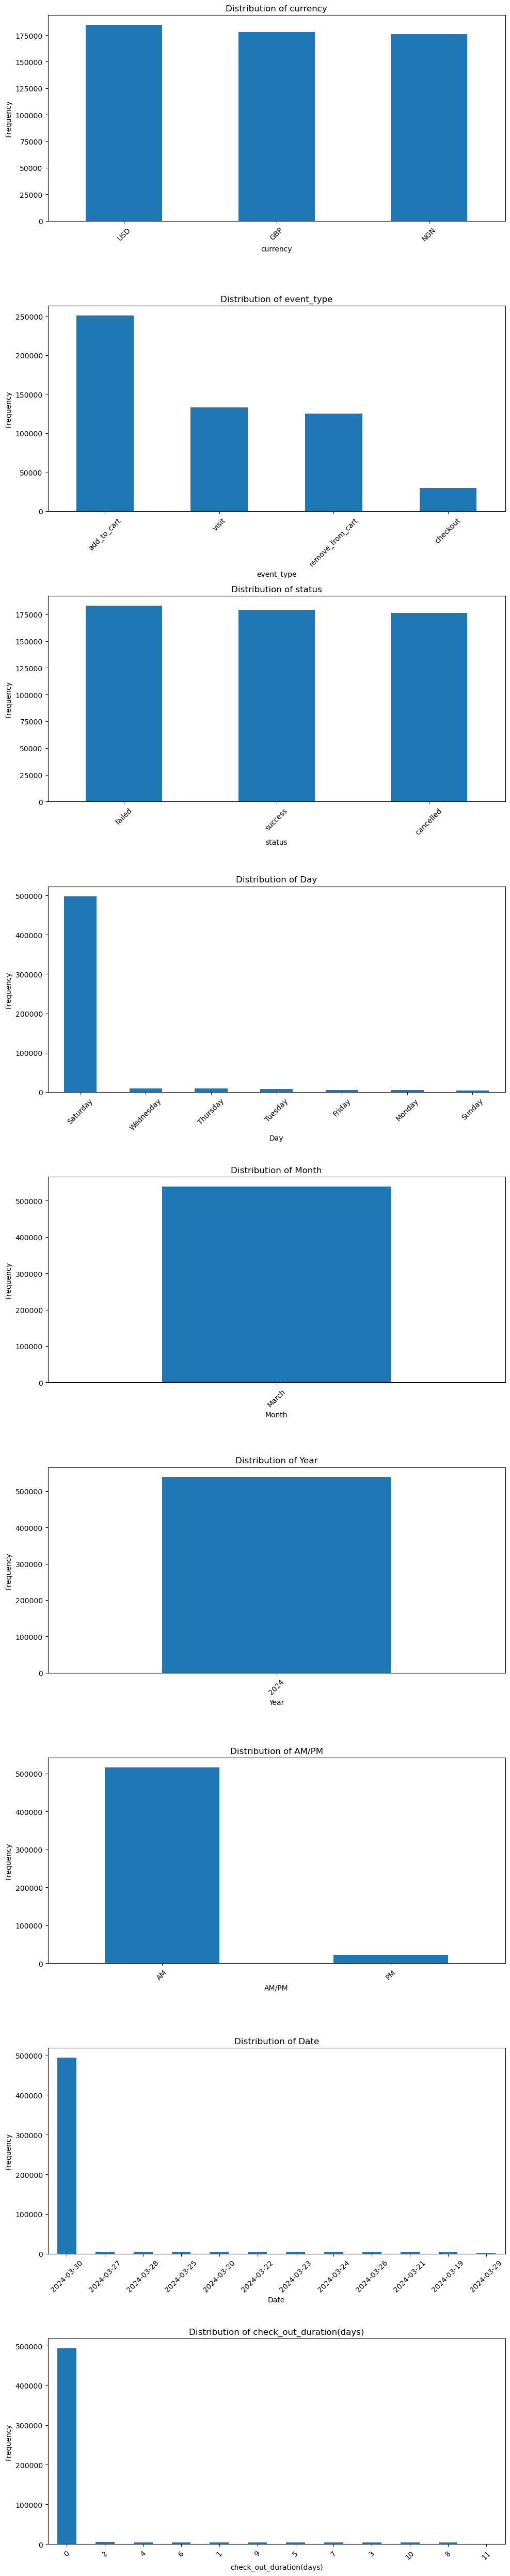

In [63]:
# Calculate the number of rows and columns for subplots
num_plots = len(cate_features)
num_rows = num_plots
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 50))

# Plot each categorical variable
for i, feature in enumerate(cate_features):
    merged_df2[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### We will take a closer look at the location and product name features

In [64]:
# check the number of locations in our dataset
merged_df2['location'].nunique()

243

### we have 243 unique locations in our dataset and this will be ambigious to visualize so we will look at the first and last 20 locations.

<Axes: title={'center': 'Location Count'}, xlabel='location'>

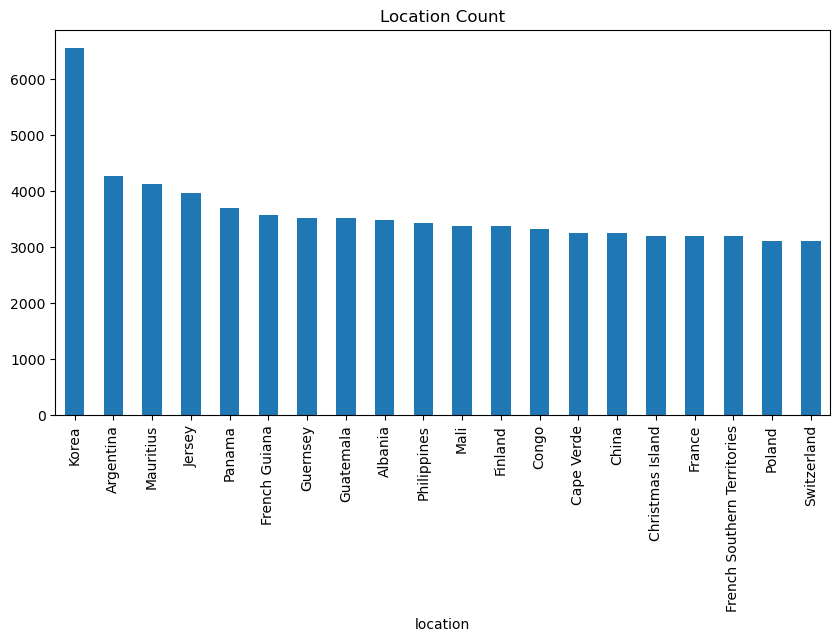

In [65]:
# get the value count of the location and plot a barchart for the first 20.
location_count = merged_df2['location'].value_counts().sort_values(ascending=False)
location_count.head(20).plot(kind='bar', figsize=(10,5), title = 'Location Count')

<Axes: title={'center': 'Location Count'}, xlabel='location'>

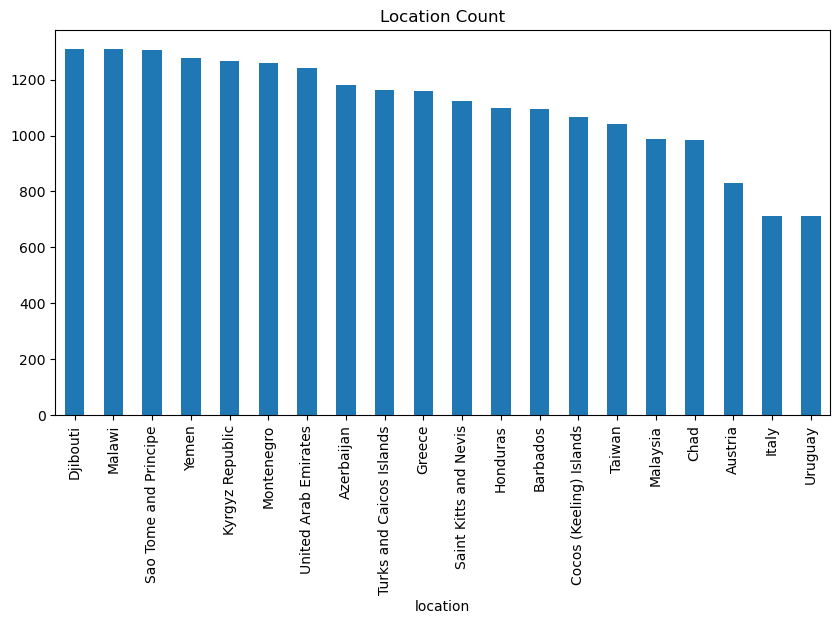

In [66]:
# get the value count of the location and plot a barchart for the last 20.
location_count = merged_df2['location'].value_counts().sort_values(ascending=False)
location_count.tail(20).plot(kind='bar', figsize=(10,5), title = 'Location Count')

### Insight:
From the bar chart we can see Korea has the highest count of above 6500 meaning most customers that visited the site are in Korea. In summary we can say that the top 3 locations are Korea, Argentina and Mauritus while the locations with the least number of customers are Austria, italy and Uruguay.

In [67]:
# check the number of products in our dataset
merged_df2['product_name'].nunique()

14

### we have 14 unique products and we will be plotting a bar chart to visualize their distribution

<Axes: title={'center': 'Product Count'}, xlabel='product_name'>

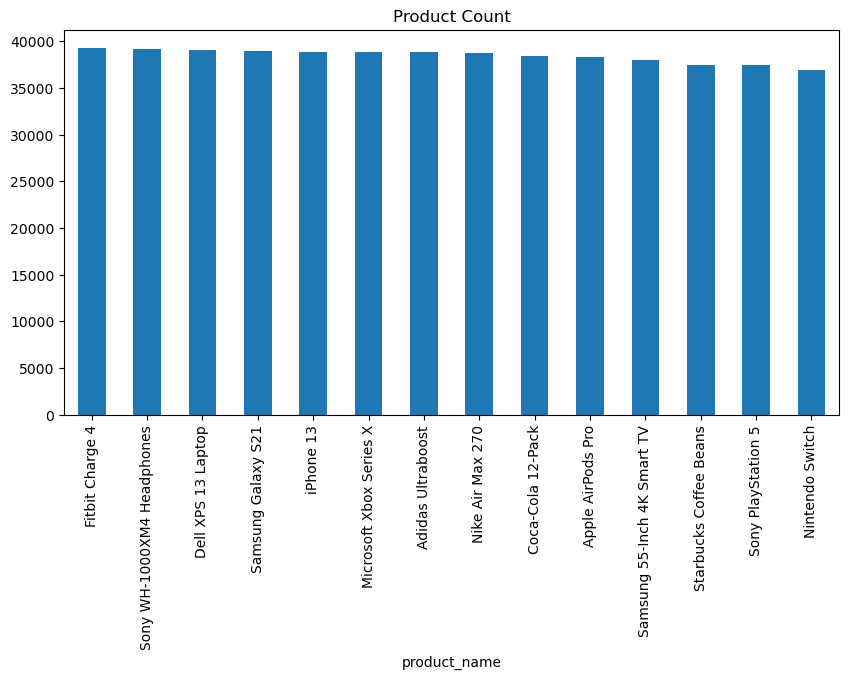

In [68]:
# get the value count of the products and plot a barchart.
product_count = merged_df2['product_name'].value_counts().sort_values(ascending=False)
product_count.head(20).plot(kind='bar', figsize=(10,5), title= 'Product Count')

### Insight:
From the chart we can see the product are well distributed with little significance in how much they were in demand. nothwithstanding the Fitbit Charge 4 has the highest count and Nintendo switch ahs the lowest count.

### Multivariate Analysis: Non-Graphical

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. 
we will be looking at the correlation between the price, quantity and checkout duration

In [69]:
merged_df2[['price', 'quantity', 'check_out_duration(days)']].corr()

,price,quantity,check_out_duration(days)
price,1.000000,0.004644,0.002234
quantity,0.004644,1.000000,-0.000371
check_out_duration(days),0.002234,-0.000371,1.000000


### Insight:
1. Price and Quantity: There is a very weak positive correlation between the price and quantity hence we can say that the price of products does not really affect the quantity purchased.

2. Price and check_out_duration(days): There is also a very weak positive correlation between the price and how many days it takes to check out hence we can say that the price of products does not really affect how long it will take for the customer to checkout their order.

3. Quantity and check_out_duration(days): There is a very weak negative correlation or almost no correlation betweeen the quantity and check_out_duration(days) hence we can say that the quantity does not affect the checkout duration.

### Multivariate Analysis: Graphical

For the multivariate graphical analysis the following visualisations will be considered:

    - Heatmap
    - Scatter Plot
    - count Plot
    - Joint Plot

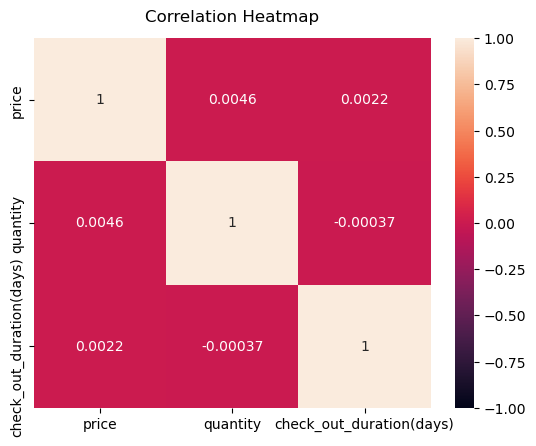

In [70]:
heatmap = sns.heatmap(merged_df2[['price', 'quantity', 'check_out_duration(days)']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

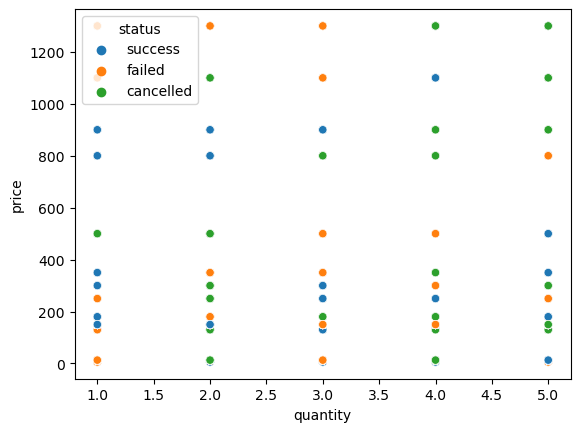

In [71]:
sns.scatterplot(x='quantity',y='price',hue='status', data=merged_df2);

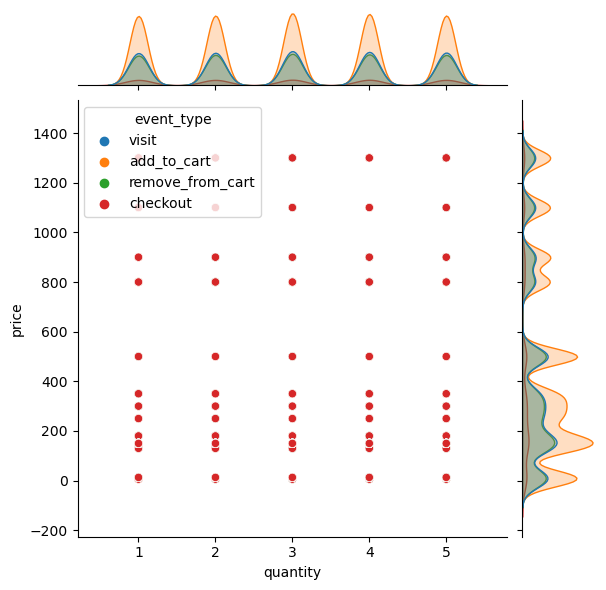

In [72]:
sns.jointplot(x = 'quantity', y = 'price', data = merged_df2, hue= 'event_type');

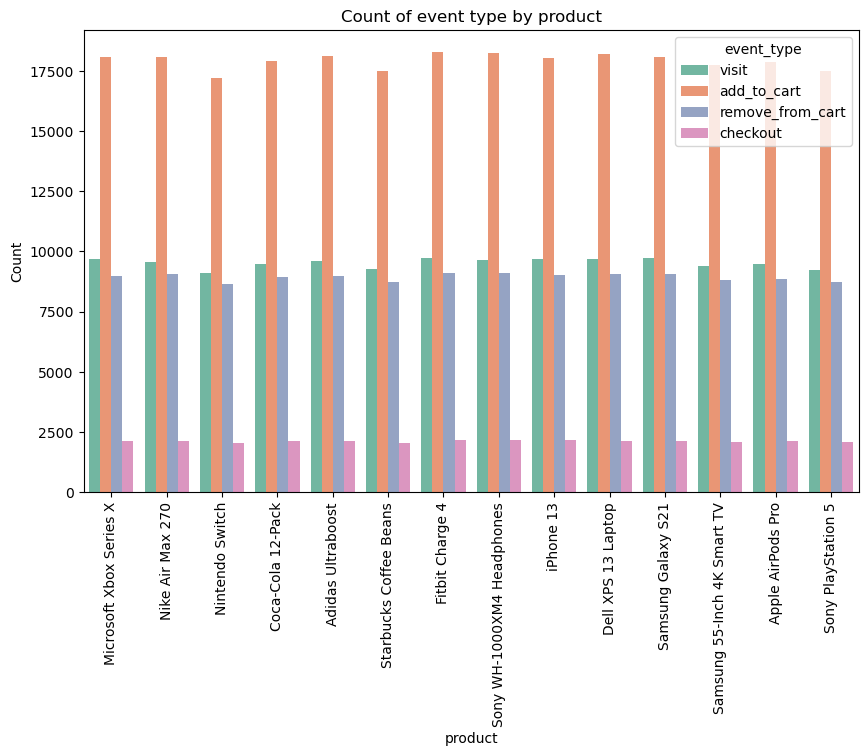

In [73]:
# Count of event_type by product
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df2, x='product_name', hue='event_type', palette='Set2')
plt.title('Count of event type by product')
plt.xlabel('product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

## Objective A:  Visit Frequency: How often does this customer visit the website, based on the provided data? Can you identify any patterns or trends in the customer's visit frequency?

Steps to Analyze Visit Frequency:

Calculate Visit Frequency:

1. Group the data by customer ID.
2. Count the number of visits for each customer.
3. Calculate the average visit frequency for all customers.

Identify Patterns or Trends:

1. Visualize the visit frequency over time to identify any patterns or trends.
2. Analyze the distribution of visit frequency to understand the typical behavior.

To study more trends and atterns we will:
1. Segment customers based on visit frequency
2. Analyze visit frequency trends over time
3. Compare visit frequency across different customer segments or cohorts

In [74]:
merged_df2.head(2)

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2


In [75]:
merged_df2['customer_id'].nunique()

4574

In [76]:
# Calculate visit frequency
visit_frequency = merged_df2.groupby('customer_id')['Date'].count().reset_index()
visit_frequency.columns = ['customer_id', 'Visit_Frequency']

visit_frequency.sort_values(by= 'Visit_Frequency', ascending=False)

,customer_id,Visit_Frequency
554,1f57130130cb,360
3696,d12e3eaca47d,360
3611,cc1402500ac7,348
1676,5e5dc4f32b9c,348
537,1e5725fe2338,341
...,...,...
130,0762df783312,3
2976,a90550a64d14,3
751,2a295782dbbb,3
2019,723d1881ab1f,3


In [77]:
# Calculate average visit frequency
average_visit_frequency = visit_frequency['Visit_Frequency'].mean()

print("Average Visit Frequency:", average_visit_frequency)

Average Visit Frequency: 117.75360734586795


In [80]:
day_count = merged_df2['Day'].value_counts()
day_count_df = pd.DataFrame(day_count).reset_index()
print(f'The day with the highest visit is {day_count_df.Day.iloc[0]} with a rate of {day_count[0]}')

The day with the highest visit is Saturday with a rate of 498158


In [81]:
time_of_day_count = merged_df2['AM/PM'].value_counts()
time_of_day_df = pd.DataFrame(time_of_day_count).reset_index()
highest_time = time_of_day_df['AM/PM'].iloc[0]
print(f'The time of day with the highest visit is ({highest_time}) with a rate of {time_of_day_count[0]}')

The time of day with the highest visit is (AM) with a rate of 516062


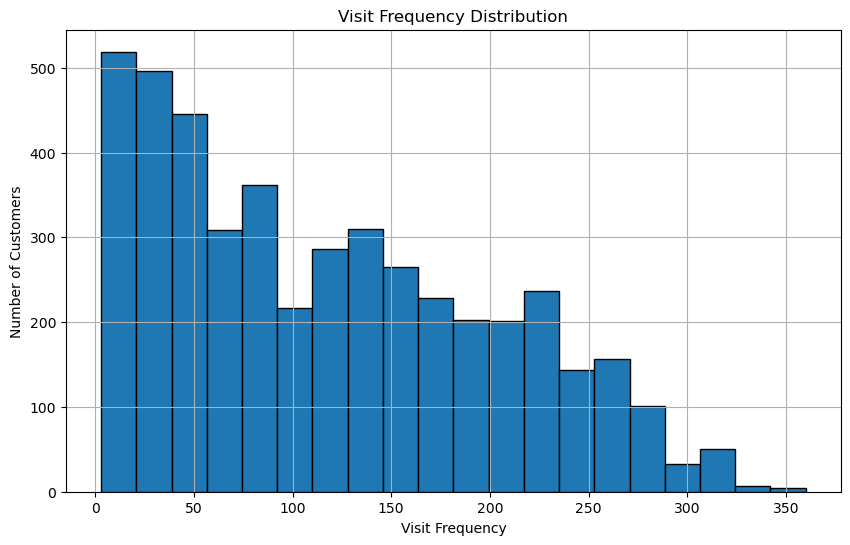

In [82]:
# Plot visit frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(visit_frequency['Visit_Frequency'], bins = 20, edgecolor='black')
plt.xlabel('Visit Frequency')
plt.ylabel('Number of Customers')
plt.title('Visit Frequency Distribution')
plt.grid(True)
plt.show()

#### Segment Customers Based on Visit Frequency
You can segment customers into different groups based on their visit frequency (e.g., high-frequency, medium-frequency, low-frequency) to better understand their behavior.

In [83]:
# Define bins for visit frequency segmentation
bins = [0, 120, 240, float('inf')]
labels = ['Low Frequency', 'Medium Frequency', 'High Frequency']

# Add 'Visit_Frequency_Group' column to DataFrame
visit_frequency['Visit_Frequency_Group'] = pd.cut(visit_frequency['Visit_Frequency'], bins=bins, labels=labels, right=False)

print(visit_frequency.head())

    customer_id  Visit_Frequency Visit_Frequency_Group
0  000cda7573f5              136      Medium Frequency
1  004891bb4a22               24         Low Frequency
2  004fb60ffd18              180      Medium Frequency
3  005dd1a4461d              240        High Frequency
4  007b9ec7ed45              264        High Frequency


In [88]:
visit_frequency

,customer_id,Visit_Frequency,Visit_Frequency_Group
0,000cda7573f5,136,Medium Frequency
1,004891bb4a22,24,Low Frequency
2,004fb60ffd18,180,Medium Frequency
3,005dd1a4461d,240,High Frequency
4,007b9ec7ed45,264,High Frequency
...,...,...,...
4569,ffdbceee5480,44,Low Frequency
4570,ffdc17333a39,65,Low Frequency
4571,ffde6e7e245d,15,Low Frequency
4572,fff22ca5b8a6,308,High Frequency


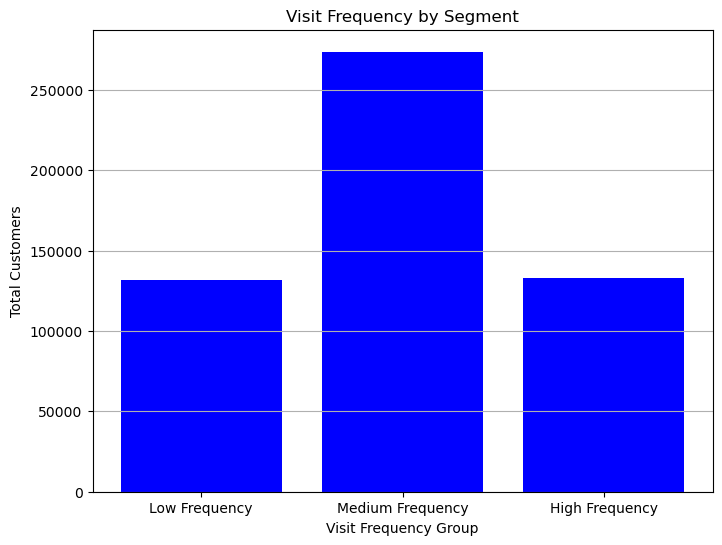

In [89]:
# Merge visit frequency with original DataFrame
df_merged = pd.merge(merged_df2, visit_frequency, on='customer_id', how= 'inner')

# Calculate visit frequency by 'Visit_Frequency_Group'
visit_frequency_segmented = df_merged.groupby('Visit_Frequency_Group')['Date'].count().reset_index()
visit_frequency_segmented.columns = ['Visit_Frequency_Group', 'Total_Customers']

# Plot visit frequency by segment
plt.figure(figsize=(8, 6))
plt.bar(visit_frequency_segmented['Visit_Frequency_Group'], visit_frequency_segmented['Total_Customers'], color='blue')
plt.xlabel('Visit Frequency Group')
plt.ylabel('Total Customers')
plt.title('Visit Frequency by Segment')
plt.grid(axis='y')
plt.show()

In [90]:
df_merged.head()

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),Visit_Frequency,Visit_Frequency_Group
0,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,70,Low Frequency
1,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2,70,Low Frequency
2,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
3,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
4,e049bab94504,Saint Helena,NGN,add_to_cart,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency


In [91]:
freq_group_event_type = df_merged.groupby('Visit_Frequency_Group')['event_type'].value_counts()
freq_group_event_type

Visit_Frequency_Group  event_type      
Low Frequency          add_to_cart          54526
                       visit                42317
                       remove_from_cart     24844
                       checkout             10290
Medium Frequency       add_to_cart         134345
                       remove_from_cart     65294
                       visit                60233
                       checkout             13915
High Frequency         add_to_cart          62014
                       remove_from_cart     34802
                       visit                30663
                       checkout              5362
Name: count, dtype: int64

<Axes: title={'center': 'Visit Frequency Group and Event Type'}, xlabel='Visit_Frequency_Group,event_type'>

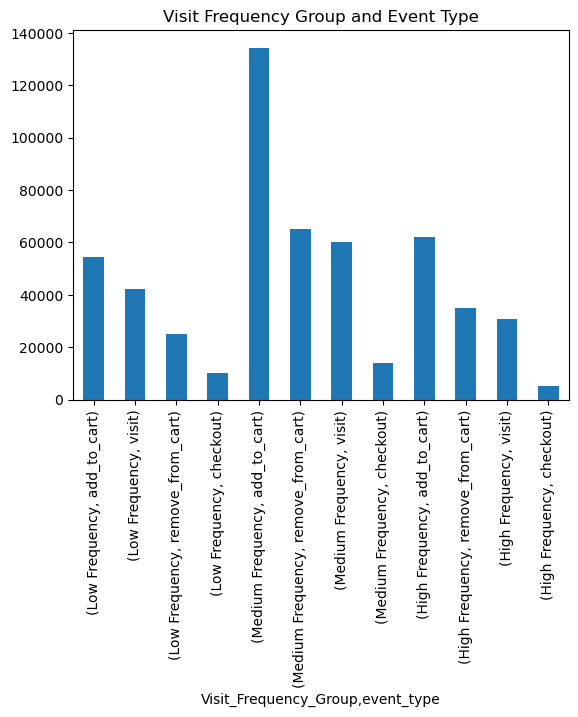

In [92]:
freq_group_event_type.plot(kind= 'bar', title= 'Visit Frequency Group and Event Type')

In [93]:
freq_group_day = df_merged.groupby('Visit_Frequency_Group')['Day'].value_counts()

In [94]:
freq_group_day

Visit_Frequency_Group  Day      
Low Frequency          Saturday     120226
                       Wednesday      2695
                       Thursday       2558
                       Tuesday        2333
                       Friday         1634
                       Monday         1273
                       Sunday         1258
Medium Frequency       Saturday     256034
                       Thursday       3952
                       Wednesday      3886
                       Tuesday        3505
                       Friday         2246
                       Monday         2108
                       Sunday         2056
High Frequency         Saturday     121898
                       Wednesday      2788
                       Thursday       2397
                       Tuesday        1976
                       Friday         1405
                       Monday         1261
                       Sunday         1116
Name: count, dtype: int64

<Axes: title={'center': 'Visit Frequency Group and Days of Visit'}, xlabel='Visit_Frequency_Group,Day'>

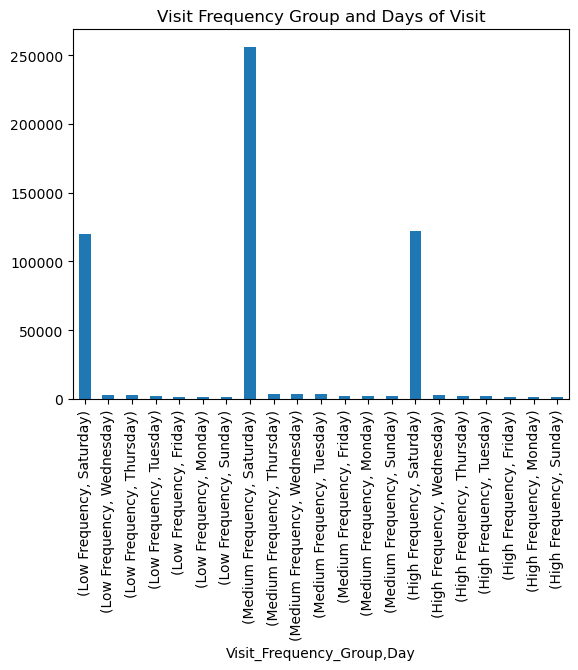

In [95]:
freq_group_day.plot(kind= 'bar', title= 'Visit Frequency Group and Days of Visit')

In [135]:
visit_frequency_segmented

,Visit_Frequency_Group,Total_Customers
0,Low Frequency,131977
1,Medium Frequency,273787
2,High Frequency,132841


## Insight on Analysis for Visit Frequency:

1. We have 4574 unique customers in our dataset and two(2) customers with id - (1f57130130cb, and d12e3eaca47d) having the highest visit frequency of 360.
2. On average, customer visit to the site is 117.8
3. From the visualization of the visit frequency and number of customers we can see that for visit frequencies between 0 and 60, they have high number of unique customers, between 60 and around 240, the have a moderate number of unique customers and from 240 above, has the lowest number of unique customers.
4. To further understand the trend, we grouped the data into 3 groups, Low Frequency, Medium Frequency and High Frequency using a threshold(0 - 120, 121 - 240, 241 and above) and plotted a bar graph and from the visualisation, the Medium frequency group has the highest number of total customers not unique customers. 
5. from 3 and 4 above, we can say that the frequency of number of unique customer decreases with increase in frequency while on a general count, the medium frequency group has the highest number of customer count.
6. From the segmentation, Low Frequency	- 131977 customers, Medium Frequency	- 273787 customers, High Frequency - 132841 customers
6. We further studied the three different group and the type of event they carried out on the site and from there we saw that for the 3 groups they all had 'add to cart' event type as their highest event type and 'checkout' as their lowest event type.
7. From the analysis of the 3 groups and their days of visit, we saw that they all had Saturday as their highest day of visiting the site.

## Objective B:  Location Analysis:
1. What is the customer's location based on the provided data?
2. How might the customer's location influence their purchasing behavior?


In [96]:
# lets view the dataset
df_merged.head()

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),Visit_Frequency,Visit_Frequency_Group
0,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,70,Low Frequency
1,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2,70,Low Frequency
2,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
3,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
4,e049bab94504,Saint Helena,NGN,add_to_cart,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency


In [97]:
# count the number of product based on their loation
pdt_by_location = merged_df2.groupby('location')[['product_name', 'price']].value_counts().reset_index()\
                        .sort_values(by= 'count', ascending= False)
pdt_by_location

,location,product_name,price,count
1596,Korea,Fitbit Charge 4,149.95,585
1597,Korea,Dell XPS 13 Laptop,1299.99,556
1598,Korea,Microsoft Xbox Series X,499.99,519
1599,Korea,iPhone 13,1099.99,497
1600,Korea,Starbucks Coffee Beans,12.99,480
...,...,...,...,...
3274,Uruguay,Samsung Galaxy S21,899.99,20
2519,Russian Federation,Sony WH-1000XM4 Headphones,349.99,20
1497,Italy,Fitbit Charge 4,149.95,20
601,Chad,Coca-Cola 12-Pack,5.99,20


<Axes: title={'center': 'Location Count'}, xlabel='location', ylabel='Number of customers'>

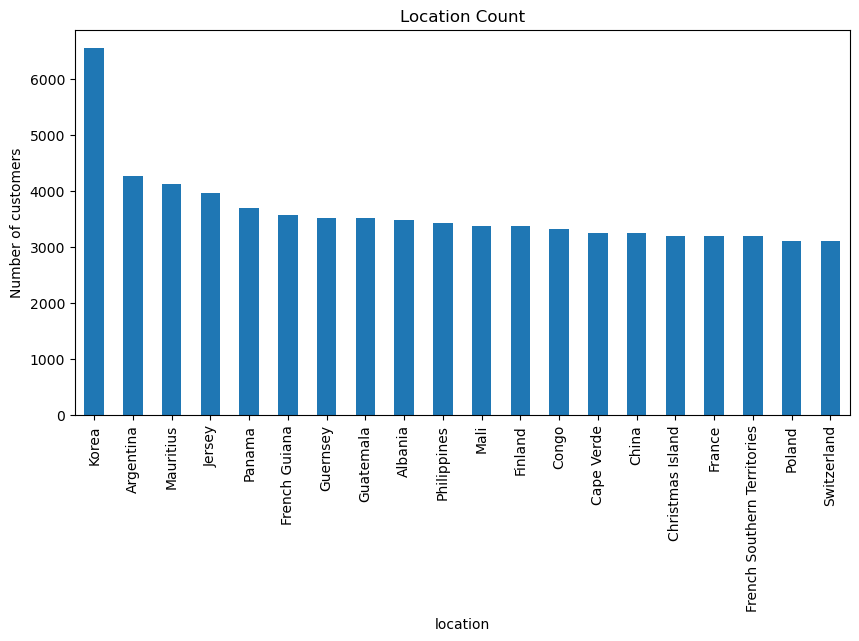

In [98]:
# get the value count of the location and plot a barchart for the first 20.
location_count = merged_df2['location'].value_counts().sort_values(ascending=False)
location_count.head(20).plot(kind='bar', figsize=(10,5), title = 'Location Count', ylabel = 'Number of customers')

In [117]:
location_count

location
Korea        6557
Argentina    4261
Mauritius    4118
Jersey       3957
Panama       3701
             ... 
Malaysia      989
Chad          984
Austria       832
Italy         713
Uruguay       711
Name: count, Length: 243, dtype: int64

<Axes: title={'center': 'Location Count'}, xlabel='location', ylabel='Number of customers'>

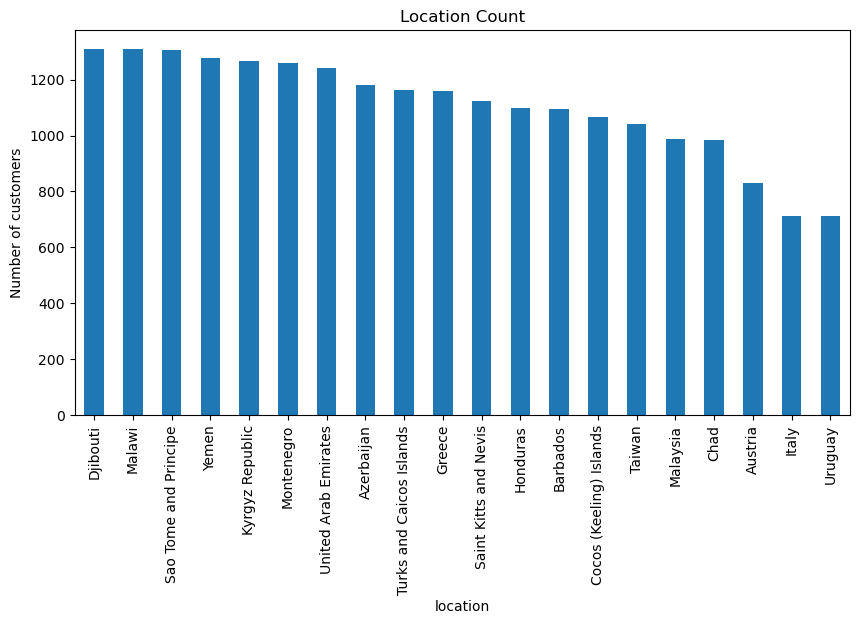

In [99]:
# get the value count of the location and plot a barchart for the last 20.
location_count = merged_df2['location'].value_counts().sort_values(ascending=False)
location_count.tail(20).plot(kind='bar', figsize=(10,5), title = 'Location Count', ylabel = 'Number of customers')

From the bar chart we can see Korea has the highest count of above 6500 meaning most customers that visited the site are in Korea. In summary we can say that the top 3 locations are Korea, Argentina and Mauritus while the locations with the least number of customers are Austria, italy and Uruguay.

We will further study this to see how the location affects the purchasing power

First we will look at the success rate or number of successful transactions

In [100]:
# get the count for the success, failed and cancelled orders
status_count = df_merged['status'].value_counts()
status_count

status
failed       182973
success      179331
cancelled    176301
Name: count, dtype: int64

<Axes: title={'center': 'status count'}, xlabel='status', ylabel='rate count'>

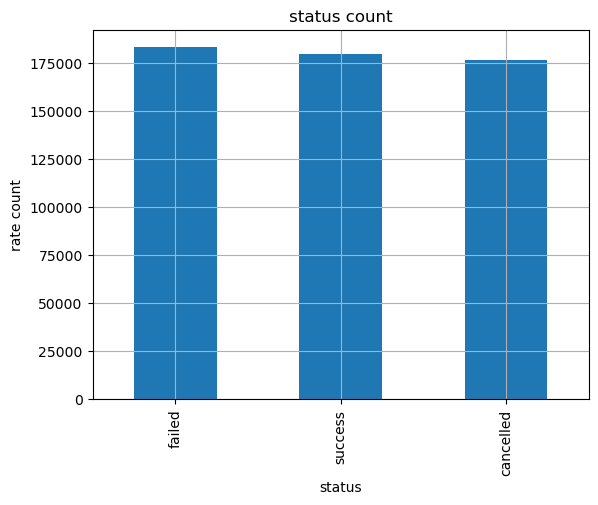

In [101]:
# plot a bar graph to visualise the rates or count
status_count.plot(kind= 'bar', grid = True, ylabel= 'rate count', title = 'status count')

In [102]:
df_merged.head()

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),Visit_Frequency,Visit_Frequency_Group
0,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,70,Low Frequency
1,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2,70,Low Frequency
2,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
3,e049bab94504,Saint Helena,NGN,visit,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency
4,e049bab94504,Saint Helena,NGN,add_to_cart,493c1a497d49,success,3201,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,70,Low Frequency


Since we have more of cancelled and failed orders, we will go ahead to look into the successful orders and see how the location affects them.

In [103]:
# create a df for only successful orders
df_success = df_merged[df_merged['status'] == 'success']

<Axes: title={'center': 'Purchasing power Distribution'}, xlabel='location', ylabel='count'>

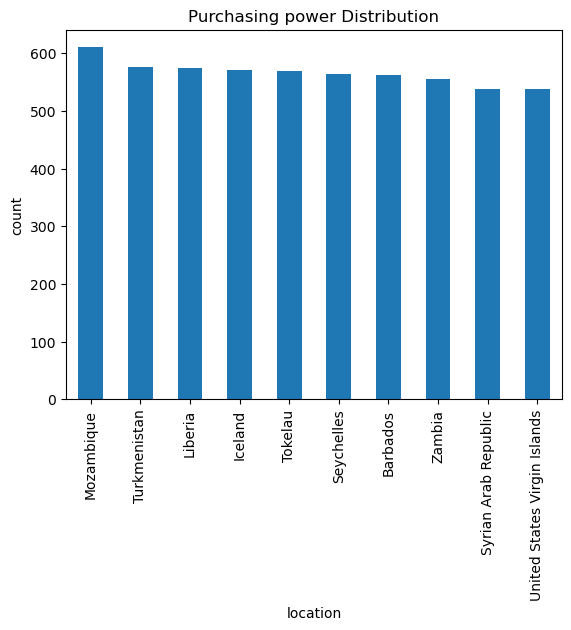

In [134]:
# Average purchasing power by country-top 10
df_success.groupby('location')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar', 
                                                                                          title = 'Purchasing power Distribution', ylabel= 'count')

Mozambique having the highest despite its low population is not looking well so we will further look into mozambique and Korea to further understand the metrics.

In [132]:
merged_df2[merged_df2['location'] == 'Mozambique']['status'].value_counts()

status
failed       797
cancelled    744
success      145
Name: count, dtype: int64

In [133]:
merged_df2[merged_df2['location'] == 'Korea']['status'].value_counts()

status
cancelled    2377
success      2322
failed       1858
Name: count, dtype: int64

In [104]:
# count the succesful purchase by location
purchase_by_location_count = df_success.groupby('location')[['product_name', 'price']].value_counts()\
                            .reset_index().sort_values(by= 'count', ascending= False)
purchase_by_location_count

,location,product_name,price,count
1792,Mauritius,Dell XPS 13 Laptop,1299.99,262
1793,Mauritius,Nike Air Max 270,129.99,216
1794,Mauritius,Fitbit Charge 4,149.95,209
1795,Mauritius,iPhone 13,1099.99,207
1506,Korea,Samsung 55-Inch 4K Smart TV,799.99,207
...,...,...,...,...
1052,Germany,Apple AirPods Pro,249.99,5
1305,Iceland,Microsoft Xbox Series X,499.99,5
847,Equatorial Guinea,Sony PlayStation 5,499.99,4
846,Equatorial Guinea,Microsoft Xbox Series X,499.99,4


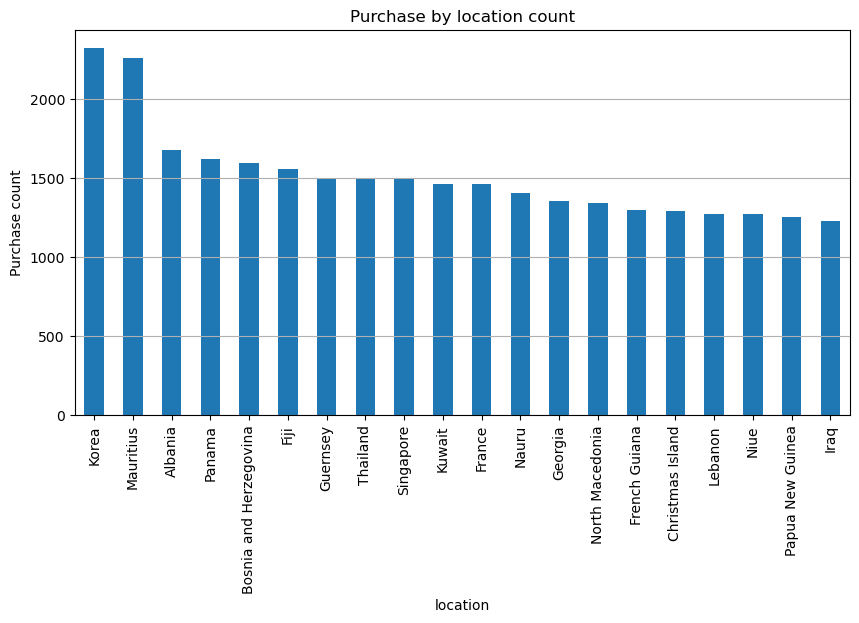

In [105]:
#group by location and sum up the number of counts
grouped_pur = purchase_by_location_count.groupby('location')['count'].sum().sort_values(ascending= False)

#plot a bar graaph to visualise the first 20
plt.figure(figsize=(10, 5))
grouped_pur.head(20).plot(kind= 'bar', x= 'location')

plt.xlabel('location')
plt.ylabel('Purchase count')
plt.title('Purchase by location count')
plt.grid(axis='y')
plt.show()

In [130]:
grouped_pur

location
Korea                        2322
Mauritius                    2258
Albania                      1678
Panama                       1621
Bosnia and Herzegovina       1595
                             ... 
Kyrgyz Republic                80
Comoros                        75
Malaysia                       24
Bouvet Island (Bouvetoya)      24
Slovenia                        9
Name: count, Length: 243, dtype: int64

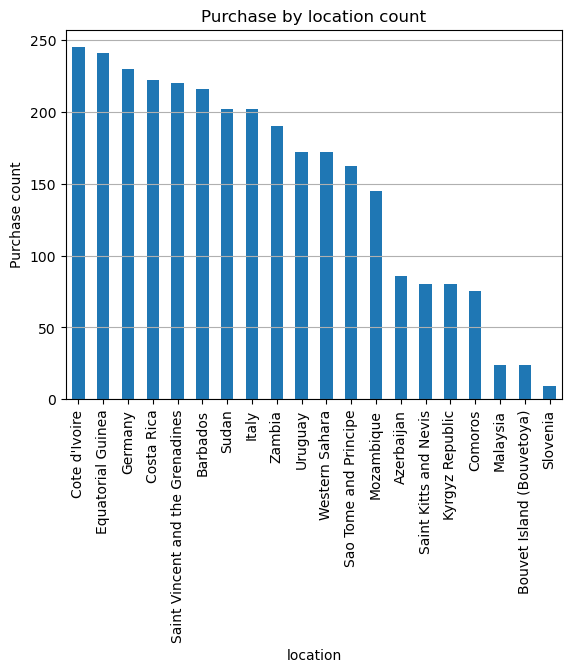

In [106]:
#plot a bar graaph to visualise the last 20
grouped_pur.tail(20).plot(kind= 'bar', x= 'location')

plt.xlabel('location')
plt.ylabel('Purchase count')
plt.title('Purchase by location count')
plt.grid(axis='y')
plt.show()

## Insight:
1. We have 243 unique locations in the dataset.
2. From the location count, we saw the distribution of customers and saw that most of the customers are coming from Korea with a count of 6557 orders.
3. From the success count, we saw that the proportion of successful order as against the total dataset is low meaning, the business is not really doing well as most of the others are either failed or cancelled.
4. Their location is affecting their purchase behaviour in the sense that some products are more purchased by a particular location, example, Koreans are big on games and fitness hence the products they purchased most.
5. On average Mozambique has the highest purchasing power despite having only 145 successful orders but this could be because of division by the low count of orders/number of customers. This cant be used as some other countries has high number of successful orders of above 2000. From further analysis we reached the below insight;
6. From the Purchase by location count we can see that Korea has the highest count(2322) followed by Mauritius(2258) and Slovenia(9) having the least count.

## Objective C: Overall Purchase Behavior:
Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
How might these insights inform marketing strategies or personalized recommendations for this customer?


In [107]:
status_count = df_merged['status'].value_counts()
status_count

status
failed       182973
success      179331
cancelled    176301
Name: count, dtype: int64

In [108]:
df_success.groupby('event_type')['status'].value_counts()

event_type        status 
add_to_cart       success    83867
checkout          success     9940
remove_from_cart  success    41116
visit             success    44408
Name: count, dtype: int64

In [109]:
df_success[['customer_id', 'Visit_Frequency']].sort_values(by='Visit_Frequency', ascending= False).head(20)

,customer_id,Visit_Frequency
267265,1f57130130cb,360
267211,1f57130130cb,360
267203,1f57130130cb,360
267204,1f57130130cb,360
267205,1f57130130cb,360
267206,1f57130130cb,360
267207,1f57130130cb,360
267208,1f57130130cb,360
267209,1f57130130cb,360
267210,1f57130130cb,360


In [110]:
df_success[df_success['customer_id']== '1f57130130cb']['status'].value_counts()

status
success    360
Name: count, dtype: int64

In [111]:
num_success = df_success['customer_id'].nunique()

In [112]:
total_num = merged_df2['customer_id'].nunique()

In [113]:
num_unsuccessful = total_num - num_success

In [114]:
print(f'The number of unique customers with successful orders is: {num_success}')
print((f'The number of unique customers with unsuccessful orders is: {num_unsuccessful}'))

The number of unique customers with successful orders is: 1542
The number of unique customers with unsuccessful orders is: 3032


In [115]:
df_unsuccessful = merged_df2[(merged_df2['status']== 'failed') | (merged_df2['status']== 'cancelled')]
df_unsuccessful.head()

,customer_id,location,currency,event_type,order_id,status,line_item_id,quantity,product_name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
14,4edfa5eb832b,Mali,NGN,visit,63bf2b6b4273,failed,3215,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
15,4edfa5eb832b,Mali,NGN,add_to_cart,63bf2b6b4273,failed,3215,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
16,4edfa5eb832b,Mali,NGN,add_to_cart,63bf2b6b4273,failed,3215,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
17,4edfa5eb832b,Mali,NGN,checkout,63bf2b6b4273,failed,3215,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
36,e03f717a1710,United States Minor Outlying Islands,NGN,visit,332e119ec822,failed,3227,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0


In [118]:
df_unsuccessful.groupby('event_type')['status'].value_counts()

event_type        status   
add_to_cart       failed       85167
                  cancelled    81851
checkout          failed        9919
                  cancelled     9708
remove_from_cart  failed       42987
                  cancelled    40837
visit             failed       44900
                  cancelled    43905
Name: count, dtype: int64

In [119]:
df_unsuccessful['location'].nunique()

243

In [120]:
df_success['location'].nunique()

243

In [121]:
merged_df2[merged_df2['location'] == 'Korea']['status'].value_counts()

status
cancelled    2377
success      2322
failed       1858
Name: count, dtype: int64

In [122]:
merged_df2[merged_df2['location'] == 'Mauritius']['status'].value_counts()

status
success      2258
failed       1223
cancelled     637
Name: count, dtype: int64

In [123]:
df_success[df_success['location']== 'Korea'][['product_name', 'price']].value_counts()

product_name                 price  
Samsung 55-Inch 4K Smart TV  799.99     207
Microsoft Xbox Series X      499.99     204
Fitbit Charge 4              149.95     197
Dell XPS 13 Laptop           1299.99    180
Samsung Galaxy S21           899.99     179
Starbucks Coffee Beans       12.99      174
Sony PlayStation 5           499.99     169
iPhone 13                    1099.99    164
Nike Air Max 270             129.99     161
Coca-Cola 12-Pack            5.99       156
Sony WH-1000XM4 Headphones   349.99     152
Nintendo Switch              299.99     145
Apple AirPods Pro            249.99     128
Adidas Ultraboost            180.00     106
Name: count, dtype: int64

In [124]:
df_success[df_success['location']== 'Mauritius'][['product_name', 'price']].value_counts()

product_name                 price  
Dell XPS 13 Laptop           1299.99    262
Nike Air Max 270             129.99     216
Fitbit Charge 4              149.95     209
iPhone 13                    1099.99    207
Microsoft Xbox Series X      499.99     186
Coca-Cola 12-Pack            5.99       165
Samsung Galaxy S21           899.99     154
Adidas Ultraboost            180.00     135
Apple AirPods Pro            249.99     134
Samsung 55-Inch 4K Smart TV  799.99     131
Sony PlayStation 5           499.99     116
Starbucks Coffee Beans       12.99      116
Sony WH-1000XM4 Headphones   349.99     114
Nintendo Switch              299.99     113
Name: count, dtype: int64

In [125]:
time_of_day_count = merged_df2['AM/PM'].value_counts()
time_of_day_count

AM/PM
AM    516062
PM     22543
Name: count, dtype: int64

<Axes: xlabel='AM/PM'>

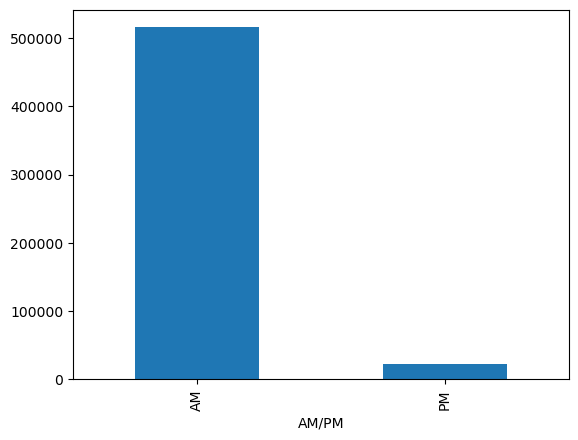

In [126]:
time_of_day_count.plot(kind= 'bar')

In [127]:
day_count = merged_df2['Day'].value_counts()
day_count

Day
Saturday     498158
Wednesday      9369
Thursday       8907
Tuesday        7814
Friday         5285
Monday         4642
Sunday         4430
Name: count, dtype: int64

<Axes: xlabel='Day'>

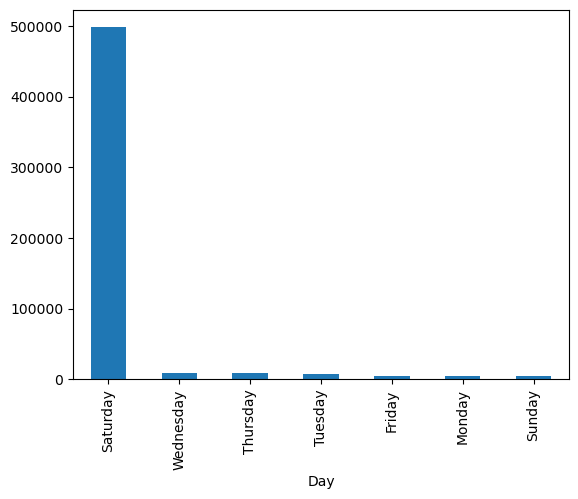

In [128]:
day_count.plot(kind= 'bar')

In [129]:
merged_df2.shape

(538605, 16)

## Insight:
1. The number of failed orders were high about 182973 out of 538605 orders.
2. The number of cancelled orders were high too of about 176301 out 538605.
3. The number of successful orders were high too of about 179331 out 538605.
3. Looking closely into the failed orders we see that even though these customers checkout some of the products they still failed which means there was an underlying factor that led to their failure which could be network related etc.
4. All locations recorded both successful and unsuccessful orders telling us the success is not location based.
5. The location and lifestyle of the customers has a relationship with what they are buying for example, Korea is big on games, electornics gadgets, fitness and fashion hence the items they bought most. Also an average Korean takes about 2 to 3 cups of coffee a day hence the high purchase of coffee. and this applies to other locations as well.
6. Most visit to the site was done in the morning times with about 516062.
7. Most visit to the site was done on Saturday with about 498158 visits which is usually a work free day for most populations.

## Personalized Marketing Strategies
From the above insights the following are some personalized marketing strategies and recommendations:

1. With the high rate of failed order, the business will not be making as much sales as possible. The company should look into why the orders are failing and see if it is something that can be fixed or alternatives provided. 
2. The company should also conduct a review test geared towards understanding factors that can make customers to cancel their order as the number of canceled orders were high too.
3. Targeted Offers: Offer discounts or promotions to high-value customers to encourage more purchases.
4. Personalized Recommendations: Use purchase history and product preferences to recommend relevant products to customers.
5. Engagement Campaigns: Engage low-frequency customers with personalized emails or campaigns to re-engage them and encourage more frequent purchases.
6. Since more vsits happpens on Saturday mornings, the company can use these periods for promotions, advertisements etc.
7. The number and variety of products recored in the datset is low, the company can look at categories of products more purchased and add more brands of these products and this can attract more customers and increase sales.


By following this analysis and leveraging the insights, you can tailor marketing strategies and personalized recommendations to enhance customer engagement, increase sales, and foster long-term customer relationships.